In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
Datos = pd.read_csv(r"D:\UNAD\4 semestre\Analisis de datos\Tarea 3\Uci.csv")

In [3]:
Datos.head(50)

,Edad,Sexo,ceruloplasmina,PresArtenRep,ColesterolLDL,MuestreoFetal,ActElectCora,FrCarMxAlcEjr,FaltadSang,DesndelSegm,Pico,ArteCoro,ExtrasisVentri,condicion
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
Datos.describe()

,Edad,Sexo,ceruloplasmina,PresArtenRep,ColesterolLDL,MuestreoFetal,ActElectCora,FrCarMxAlcEjr,FaltadSang,DesndelSegm,Pico,ArteCoro,ExtrasisVentri,condicion
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'Identificación de datos faltantes')

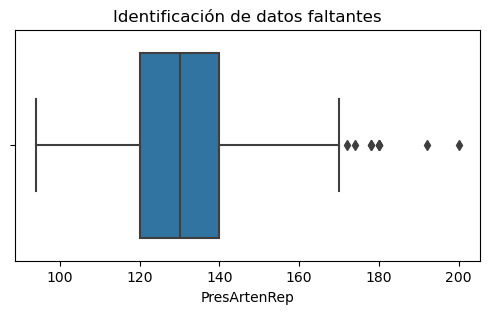

In [11]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['PresArtenRep'])
plt.title('Identificación de datos faltantes')

In [7]:
print("Cantidad de registros con cero en nivel en Ceruloplasmina: ",Datos['ceruloplasmina'].isin([0]).sum())
print("Cantidad de registros con cero en nivel en Descenso del Segmento: ",Datos['DesndelSegm'].isin([0]).sum())
print("Cantidad de registros con cero en nivel en Actividad Electrica del Corazón : ",Datos['ActElectCora'].isin([0]).sum())
print("Cantidad de registros con cero en nivel en Falta de Sangre: ",Datos['FaltadSang'].isin([0]).sum())
print("Cantidad de registros con cero en nivel en Pico Maximo ECG: ",Datos['Pico'].isin([0]).sum())

Cantidad de registros con cero en nivel en Ceruloplasmina:  23
Cantidad de registros con cero en nivel en Descenso del Segmento:  96
Cantidad de registros con cero en nivel en Actividad Electrica del Corazón :  147
Cantidad de registros con cero en nivel en Falta de Sangre:  200
Cantidad de registros con cero en nivel en Pico Maximo ECG:  139


In [8]:
Datos['ceruloplasmina']=Datos['ceruloplasmina'].replace(0,Datos['ceruloplasmina'].mean())
Datos['DesndelSegm']=Datos['DesndelSegm'].replace(0,Datos['DesndelSegm'].mean())
Datos['ActElectCora']=Datos['ActElectCora'].replace(0,Datos['ActElectCora'].mean())
Datos['FaltadSang']=Datos['FaltadSang'].replace(0,Datos['FaltadSang'].mean())
Datos['Pico']=Datos['Pico'].replace(0,Datos['Pico'].mean())

In [9]:
print("Cantidad de registros con cero en nivel en Ceruloplasmina: ",Datos['ceruloplasmina'].isin([0]).sum())
print("Cantidad de registros con cero en nivel en Descenso del Segmento: ",Datos['DesndelSegm'].isin([0]).sum())
print("Cantidad de registros con cero en nivel en Actividad Electrica del Corazón : ",Datos['ActElectCora'].isin([0]).sum())
print("Cantidad de registros con cero en nivel en Falta de Sangre: ",Datos['FaltadSang'].isin([0]).sum())
print("Cantidad de registros con cero en nivel en Pico Maximo ECG: ",Datos['Pico'].isin([0]).sum())

Cantidad de registros con cero en nivel en Ceruloplasmina:  0
Cantidad de registros con cero en nivel en Descenso del Segmento:  0
Cantidad de registros con cero en nivel en Actividad Electrica del Corazón :  0
Cantidad de registros con cero en nivel en Falta de Sangre:  0
Cantidad de registros con cero en nivel en Pico Maximo ECG:  0


Text(0.5, 1.0, 'Identificación de datos atípicos')

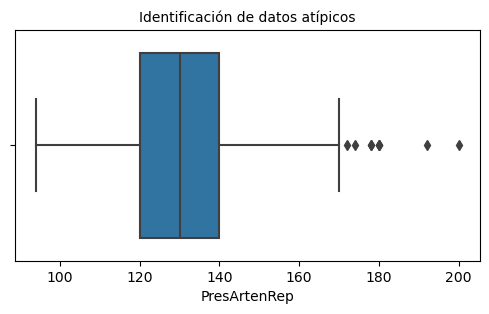

In [10]:
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['PresArtenRep'])
plt.title('Identificación de datos atípicos', fontsize=10)

In [14]:
nivel_minimo=60
nivel_maximo=130
total_atipicos=((Datos['PresArtenRep']<nivel_minimo)|(Datos['PresArtenRep']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_atipicos))

El total de datos atipicos es 129


In [15]:
Datos=Datos[(Datos['PresArtenRep']<nivel_maximo)&(Datos['PresArtenRep']>nivel_minimo)]

In [16]:
total_atipicos=((Datos['PresArtenRep']<nivel_minimo)|(Datos['PresArtenRep']>nivel_maximo)).sum()
print("El total de datos atipicos es {}".format(total_atipicos))

El total de datos atipicos es 0


In [17]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 132 entries, 4 to 296
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Edad            132 non-null    int64  
 1   Sexo            132 non-null    int64  
 2   ceruloplasmina  132 non-null    float64
 3   PresArtenRep    132 non-null    int64  
 4   ColesterolLDL   132 non-null    int64  
 5   MuestreoFetal   132 non-null    int64  
 6   ActElectCora    132 non-null    float64
 7   FrCarMxAlcEjr   132 non-null    int64  
 8   FaltadSang      132 non-null    float64
 9   DesndelSegm     132 non-null    float64
 10  Pico            132 non-null    float64
 11  ArteCoro        132 non-null    int64  
 12  ExtrasisVentri  132 non-null    int64  
 13  condicion       132 non-null    int64  
dtypes: float64(5), int64(9)
memory usage: 15.5 KB


In [18]:
Datos['condicion'].value_counts()

condicion
0    75
1    57
Name: count, dtype: int64

In [19]:
Datos[['condicion']].head(50)

,condicion
4,0
14,0
15,0
17,0
18,1
21,1
22,0
23,0
28,1
29,0


In [21]:
x=Datos.drop('condicion',axis=1)
y=Datos['condicion']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state= 0)

In [22]:
print (x_train)

     Edad  Sexo  ceruloplasmina  PresArtenRep  ColesterolLDL  MuestreoFetal  \
187    62     1             3.0           120            267              0   
216    58     1             3.0           128            259              0   
57     45     0             1.0           112            160              0   
246    54     1             3.0           110            239              0   
36     56     1             1.0           120            240              0   
..    ...   ...             ...           ...            ...            ...   
101    58     0             2.0           120            340              0   
131    48     1             2.0           124            255              1   
23     74     0             1.0           120            269              0   
163    67     1             3.0           100            299              0   
29     62     1             1.0           128            208              1   

     ActElectCora  FrCarMxAlcEjr  FaltadSang  Desnd

In [23]:
print (y_train)

187    1
216    1
57     0
246    1
36     0
      ..
101    0
131    0
23     0
163    1
29     0
Name: condicion, Length: 99, dtype: int64


In [25]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit(x_train, y_train)

Prediccion = modelo_regresion.predict(x_test)

In [26]:
print (y_test)

137    0
38     0
43     0
231    0
59     0
54     0
119    0
69     0
109    0
274    1
265    0
127    0
138    0
66     0
70     0
49     0
86     1
294    1
291    1
255    1
166    0
68     0
174    1
112    0
129    1
248    1
278    0
133    1
244    1
31     1
282    1
161    1
34     1
Name: condicion, dtype: int64


In [27]:
print (Prediccion)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 0]


In [28]:
print (classification_report(y_test, Prediccion))

              precision    recall  f1-score   support

           0       0.83      1.00      0.90        19
           1       1.00      0.71      0.83        14

    accuracy                           0.88        33
   macro avg       0.91      0.86      0.87        33
weighted avg       0.90      0.88      0.87        33



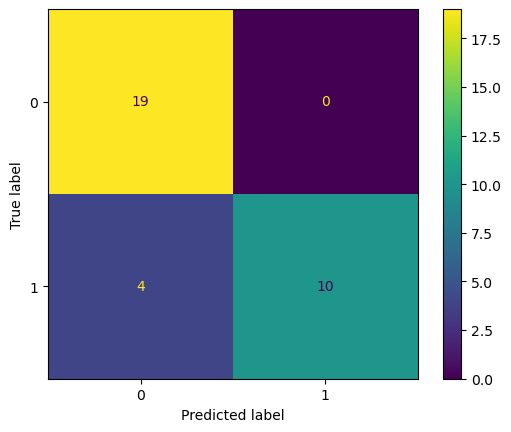

In [30]:
cm=confusion_matrix(y_test, Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

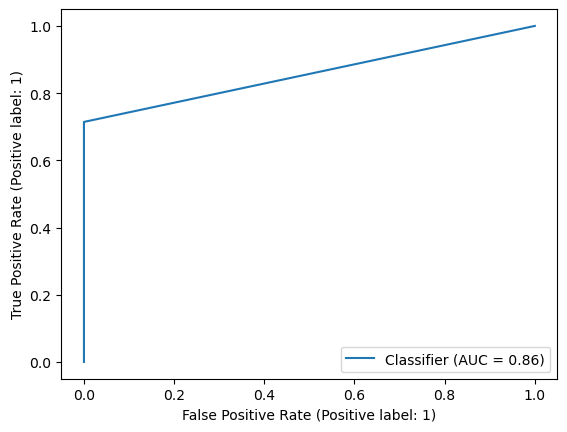

In [31]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, Prediccion)
plt.show()